<a href="https://colab.research.google.com/github/Utkarsha-906/Next24internship-task3/blob/main/summerheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
data = pd.read_csv('/content/historical_weather_data.csv')

In [ ]:
# Inspect the data
print("Data Head:")
print(data.head())

print("\nData Columns:")
print(data.columns)

Data Head:
         Date   Station  Temperature  Precipitation   Humidity  WindSpeed  \
0  2020-01-01  Station1     6.653288        0.00000  64.421750   9.562955   
1  2020-01-02  Station1    -2.031372        2.98847  85.492843   6.502074   
2  2020-01-03  Station1    -6.428333        0.00000  90.456869   3.486873   
3  2020-01-04  Station1    31.471383        0.00000  98.352442  17.288559   
4  2020-01-05  Station1    34.220877        0.00000  89.589972  12.807424   

  WeatherCondition  
0    Partly Cloudy  
1           Cloudy  
2             Snow  
3    Partly Cloudy  
4             Snow  

Data Columns:
Index(['Date', 'Station', 'Temperature', 'Precipitation', 'Humidity',
       'WindSpeed', 'WeatherCondition'],
      dtype='object')


In [ ]:
# Check if 'Date' column exists and convert it to datetime
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
else:
    raise KeyError("The 'Date' column is missing from the dataset")


In [ ]:
# Handle missing values (if any)
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].median())
data['Precipitation'] = data['Precipitation'].fillna(data['Precipitation'].median())
data['Humidity'] = data['Humidity'].fillna(data['Humidity'].median())
data['WindSpeed'] = data['WindSpeed'].fillna(data['WindSpeed'].median())

In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
                      Date  Temperature  Precipitation     Humidity  \
count                 1095  1095.000000    1095.000000  1095.000000   
mean   2020-07-01 00:00:00    12.378222       1.704898    65.686983   
min    2020-01-01 00:00:00    -9.917431       0.000000    30.080449   
25%    2020-04-01 00:00:00     1.011684       0.000000    48.814778   
50%    2020-07-01 00:00:00    11.848181       0.000000    65.515553   
75%    2020-09-30 00:00:00    23.943024       2.716680    83.111551   
max    2020-12-30 00:00:00    34.801968       9.981918    99.982887   
std                    NaN    12.999715       2.882439    20.053421   

         WindSpeed  
count  1095.000000  
mean      9.826464  
min       0.002290  
25%       4.928115  
50%       9.752793  
75%      14.669068  
max      19.996688  
std       5.864450  


In [ ]:
# Time Series Analysis
data.set_index('Date', inplace=True)

In [ ]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [ ]:
# Resample and calculate the monthly mean for numeric columns
monthly_means = data[numeric_columns].resample('M').mean()

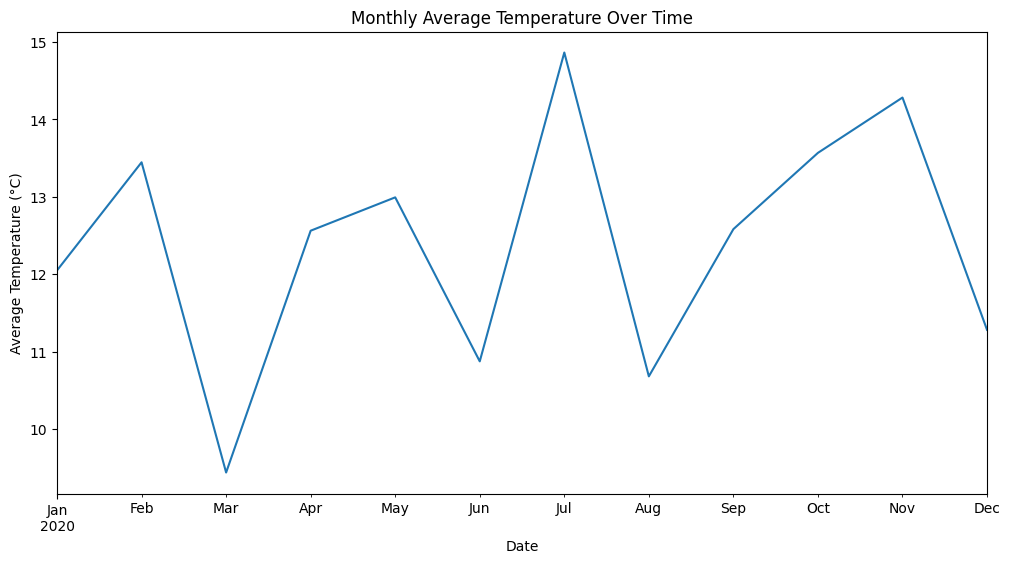

In [ ]:
# Plotting Monthly Average Temperature
plt.figure(figsize=(12, 6))
monthly_means['Temperature'].plot()
plt.title('Monthly Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.show()

In [ ]:
# Correlation Analysis
correlation_matrix = data[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               Temperature  Precipitation  Humidity  WindSpeed
Temperature       1.000000      -0.021272 -0.003385  -0.014095
Precipitation    -0.021272       1.000000 -0.018487   0.080818
Humidity         -0.003385      -0.018487  1.000000   0.020158
WindSpeed        -0.014095       0.080818  0.020158   1.000000


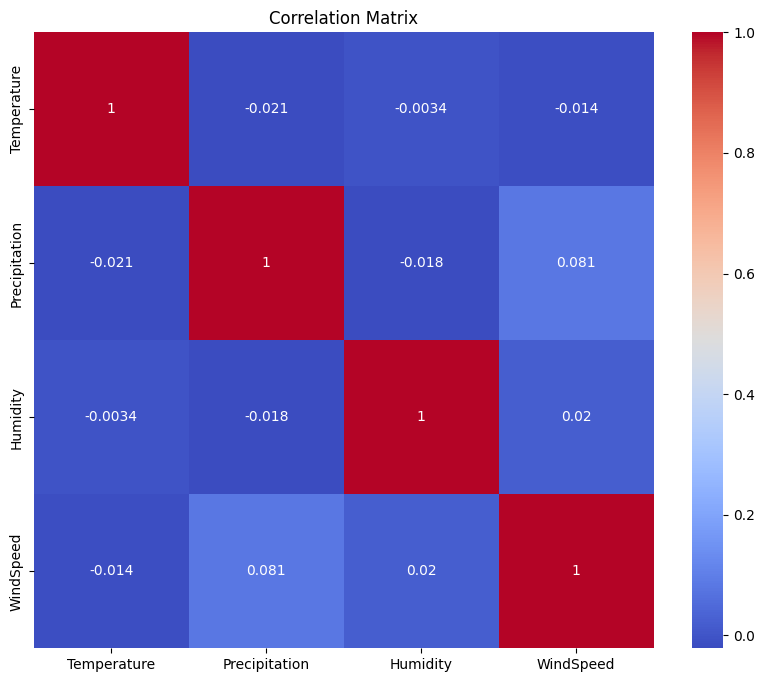

In [ ]:
# Visualization of the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

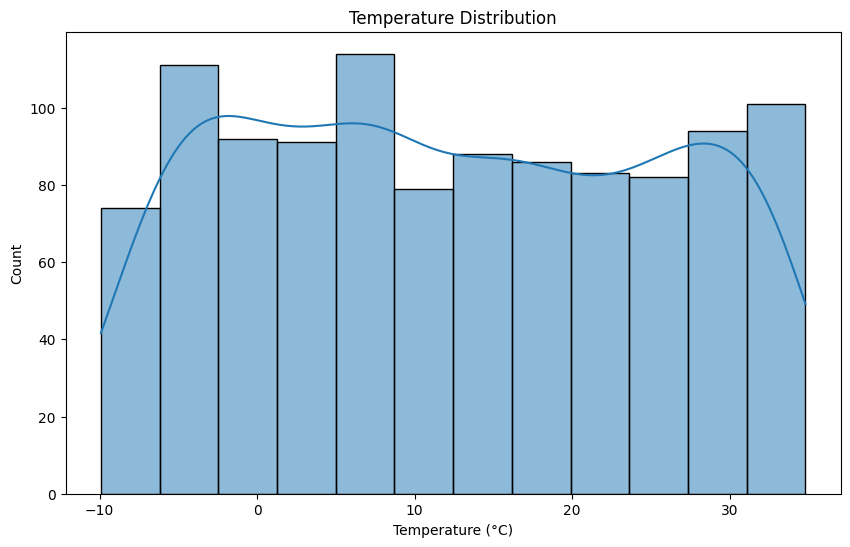

In [ ]:
# Temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()

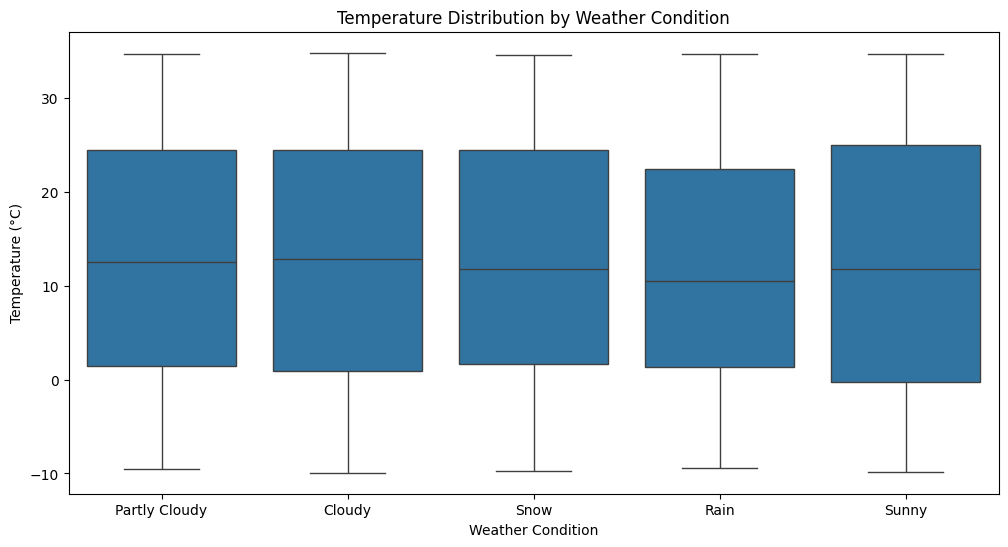

In [ ]:
# Boxplot for Temperature by Weather Condition
if 'WeatherCondition' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='WeatherCondition', y='Temperature', data=data)
    plt.title('Temperature Distribution by Weather Condition')
    plt.xlabel('Weather Condition')
    plt.ylabel('Temperature (°C)')
    plt.show()

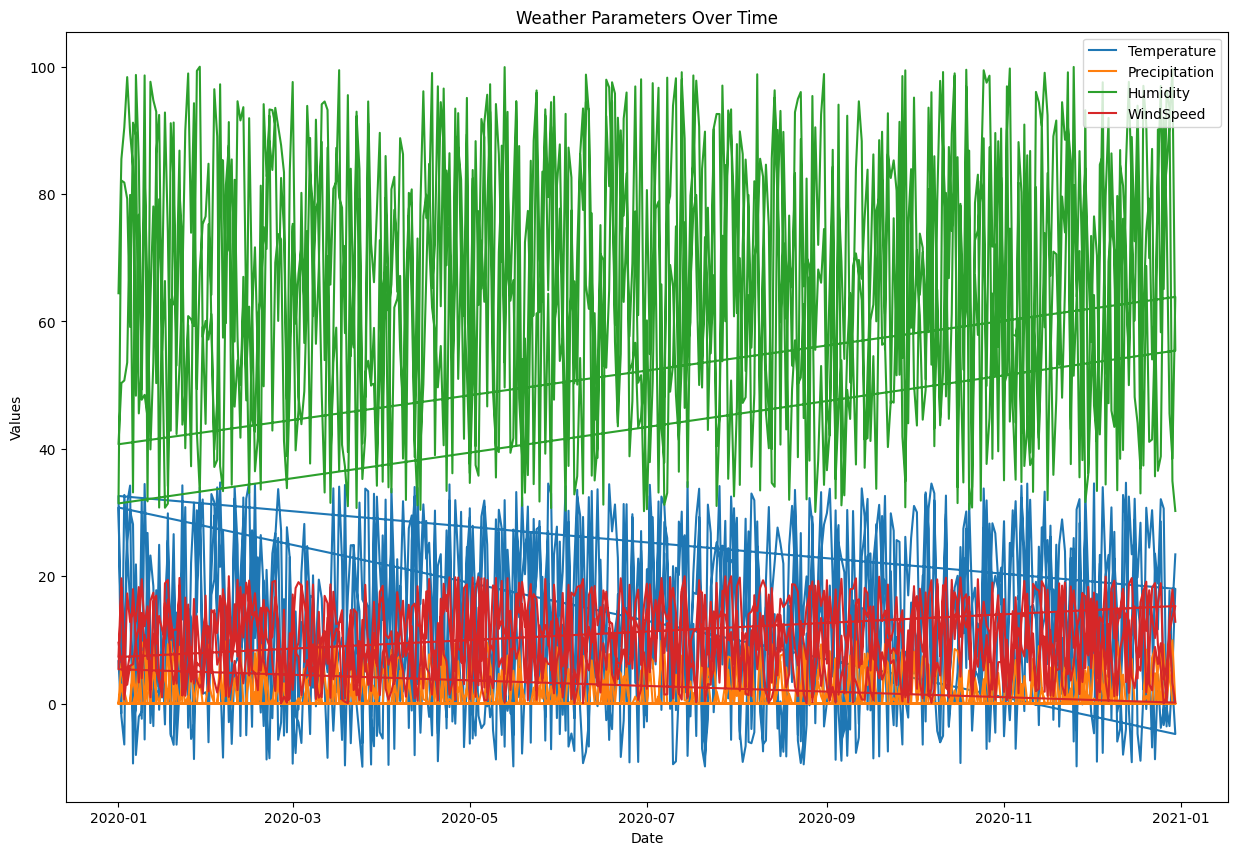

In [ ]:
# Line plot for all weather parameters over time
plt.figure(figsize=(15, 10))
for column in ['Temperature', 'Precipitation', 'Humidity', 'WindSpeed']:
    plt.plot(data.index, data[column], label=column)
plt.title('Weather Parameters Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
# Summary
print("\nSummary:")
print("1. The dataset covers weather data over the specified period.")
print("2. Basic descriptive statistics provide insight into the distribution of weather parameters.")
print("3. Time series analysis shows monthly trends in temperature.")
print("4. Correlation analysis reveals relationships between different weather parameters.")
print("5. Visualizations help in understanding data distributions and patterns.")



Summary:
1. The dataset covers weather data over the specified period.
2. Basic descriptive statistics provide insight into the distribution of weather parameters.
3. Time series analysis shows monthly trends in temperature.
4. Correlation analysis reveals relationships between different weather parameters.
5. Visualizations help in understanding data distributions and patterns.
